In [1]:
import rnn, vae, config
import torch
import numpy as np
import matplotlib.pyplot as plt
import train_rnn
import train_vae
import json

64.0 22 500

0.0 7(?) 500

In [6]:
### Preprocessing the test rollouts with VAE

dim_latent_z = 8
# training VAE
vae_model = vae.VAE(latent_dim=dim_latent_z).to(config.device)
vae_model.load_state_dict(torch.load(f"data/vae_model_{dim_latent_z}dimlatent.pt", map_location=config.device))

filenames = [f"data/rollouts_2000_dqn_100.npz"]
lidar_store = train_vae.load_data(filenames)
train_vae.save_processed_observations(vae_model, lidar_store, f"data/vae_preprocessed_{config.vae_latent_dim}dimlatent_test_dqn.npz")
train_vae.save_processed_environmental_variables(filenames, f"data/vae_rollouts_env_vars_test_dqn.npz")

filenames = [f"data/rollouts_2000_dqn_100.npz"]
lidar_store = train_vae.load_data(filenames)
train_vae.save_processed_observations(vae_model, lidar_store, f"data/vae_preprocessed_{config.vae_latent_dim}dimlatent_test_random.npz")
train_vae.save_processed_environmental_variables(filenames, f"data/vae_rollouts_env_vars_test_random.npz")

In [30]:
random_index = 20
lambda_sv = 64.0
state_vars_to_predict = [9, 10, 11]
detach_gradients = False
use_layernorm = False
truncate_at_batch = 40
n_hidden = 128
train_epochs = 250
save_every_epochs = 50
max_gradient_norm = 100.0
lr = 0.001
random_index = random_index
lambda_sv = lambda_sv
dim_latent_z = 8

sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict) > 0 else 'X'
rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
         f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"

array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.127568, 0.566949, 0.550556, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

In [116]:
import os
lambda_svs = [0.0, 4.0, 8.0, 16.0, 32.0, 64.0]
for random_index in range(20, 40):
    for lambda_sv_i, lambda_sv in enumerate(lambda_svs):
        color = plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(lambda_svs)))[lambda_sv_i]
        state_vars_to_predict = [9, 10, 11]
        detach_gradients = False
        use_layernorm = False
        truncate_at_batch = 40
        n_hidden = 128
        train_epochs = 250
        save_every_epochs = 50
        max_gradient_norm = 100.0
        lr = 0.001
        random_index = random_index
        lambda_sv = lambda_sv
        dim_latent_z = 8
        #if lambda_sv == 0: state_vars_to_predict = []
        
        sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict)>0 else 'X'
        rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
                 f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"

        last_epoch = 0
        for file in os.listdir(f"data/rnn{rnn_id}/"):
            if file.startswith("rnn_model_epoch") and file.endswith(".pt"):
                epoch_num = int(file.split("epoch")[1].split(".")[0])
                if epoch_num > last_epoch:
                    last_epoch = epoch_num
        #print(lambda_sv, random_index, last_epoch)

In [14]:
import numpy as np

data = '''
0.0 0 250
0.0 1 400
0.0 2 200
0.0 3 50
0.0 4 250
0.0 5 50
0.0 6 50
0.0 7 200
0.0 8 200
0.0 9 100
0.0 10 200
0.0 11 500
0.0 12 100
0.0 13 250
0.0 14 100
0.0 15 250
0.0 16 100
0.0 17 150
0.0 18 150
0.0 19 150
'''

# Split the data into lines and remove empty lines
lines = [line.strip() for line in data.split('\n') if line.strip()]

# Extract the third number from each line
third_numbers = [int(line.split()[2]) for line in lines]

# Convert the list of third numbers to a NumPy array
result = np.array(third_numbers)

print(result)

[250 400 200  50 250  50  50 200 200 100 200 500 100 250 100 250 100 150
 150 150]


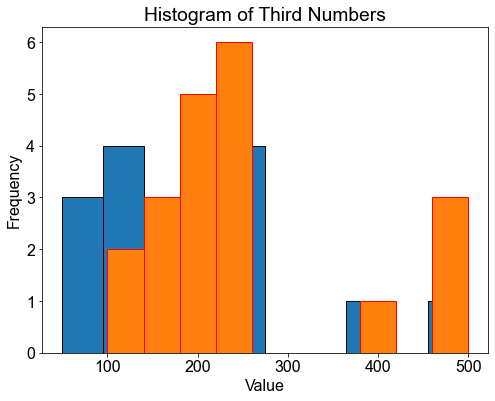

In [15]:
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(result, bins=10, edgecolor='black')
plt.hist(result1, bins=10, edgecolor='red')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Third Numbers')
plt.show()

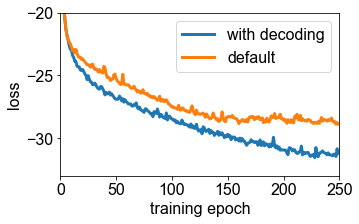

In [3]:
plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed

state_vars_to_predict=[9, 10, 11]
detach_gradients = True
truncate_at_batch = 40
use_layernorm = True
random_index = 1
rnn_id = f"dg{1 if detach_gradients else 0}_ln{1 if use_layernorm else 0}_da{truncate_at_batch}_dv{len(state_vars_to_predict)}_r{random_index}"
dim_latent_z = 8
with open(f'data/rnn{rnn_id}/rnn_meta.json', "r") as in_file:
    rnn_meta = json.loads(in_file.read())
losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
plt.plot(np.mean(losses_store, axis=1)[:, 0], linewidth=3, label="with decoding")

state_vars_to_predict=[]
rnn_id = f"dg{1 if detach_gradients else 0}_ln{1 if use_layernorm else 0}_da{truncate_at_batch}_dv{len(state_vars_to_predict)}_r{random_index}"
with open(f'data/rnn{rnn_id}/rnn_meta.json', "r") as in_file:
    rnn_meta = json.loads(in_file.read())
losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
plt.plot(np.mean(losses_store, axis=1)[:, 0], linewidth=3, label="default")

plt.legend()
plt.ylim(-33, -20)
plt.xlim(0, 250)
plt.xlabel("training epoch")
plt.ylabel("loss")
plt.show()

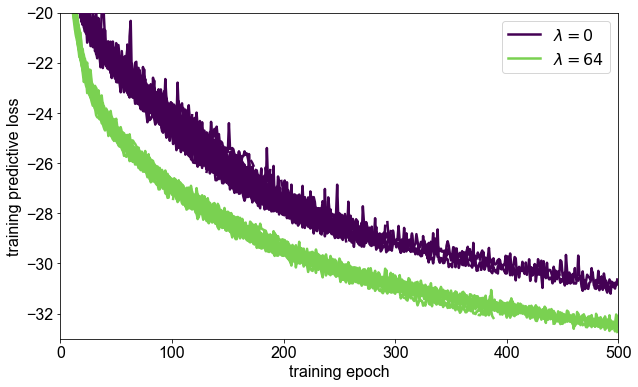

In [36]:
plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

lambda_svs = [0.0, 4.0, 8.0, 16.0, 32.0, 64.0]
lambda_svs = [0.0, 64.0]

for lambda_sv_i, lambda_sv in enumerate(lambda_svs):
    for state_vars_to_predict in [[9, 10, 11]]:
        for random_index in (range(20, 40) if lambda_sv_i!=0 else range(40)):
            color = plt.cm.get_cmap('viridis')(np.linspace(0, .8, len(lambda_svs)))[lambda_sv_i]
            detach_gradients = False
            use_layernorm = False
            truncate_at_batch = 40
            n_hidden = 128
            train_epochs = 250
            save_every_epochs = 50
            max_gradient_norm = 100.0
            lr = 0.001
            random_index = random_index
            lambda_sv = lambda_sv
            dim_latent_z = 8
            #if lambda_sv == 0: state_vars_to_predict = []
            
            sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict)>0 else 'X'
            rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
                     f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"

            try:
                losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
                zorder = 10 if lambda_sv_i == 0 else 1
                plt.plot(np.mean(losses_store, axis=1)[:, 0], linewidth=2.5, color=color, 
                         label=f"$\lambda={int(lambda_sv)}$" if random_index==20 else None, 
                         zorder=zorder)
            except Exception:
                print(f"Exception at {rnn_id}")

plt.legend()
plt.ylim(-33, -22)
plt.xlim(0, 500)
plt.ylim(-33, -20)
plt.xlim(0, 500)
#plt.xscale('log')
plt.xlabel("training epoch")
plt.ylabel("training predictive loss")
plt.show()

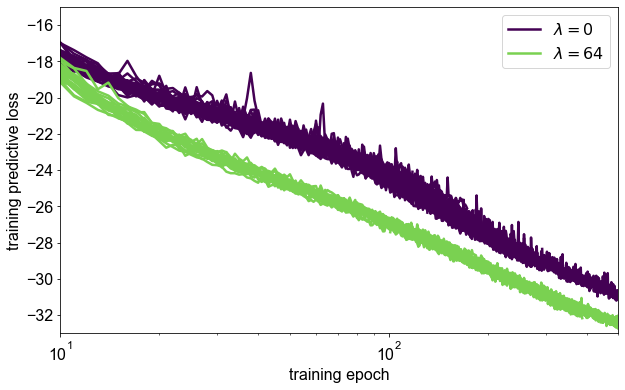

In [35]:
plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

lambda_svs = [0.0, 4.0, 8.0, 16.0, 32.0, 64.0]
lambda_svs = [0.0, 64.0]

for lambda_sv_i, lambda_sv in enumerate(lambda_svs):
    for state_vars_to_predict in [[9, 10, 11]]:
        for random_index in (range(20, 40) if lambda_sv_i!=0 else range(40)):
            color = plt.cm.get_cmap('viridis')(np.linspace(0, .8, len(lambda_svs)))[lambda_sv_i]
            detach_gradients = False
            use_layernorm = False
            truncate_at_batch = 40
            n_hidden = 128
            train_epochs = 250
            save_every_epochs = 50
            max_gradient_norm = 100.0
            lr = 0.001
            random_index = random_index
            lambda_sv = lambda_sv
            dim_latent_z = 8
            #if lambda_sv == 0: state_vars_to_predict = []
            
            sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict)>0 else 'X'
            rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
                     f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"

            try:
                losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']                
                plt.plot(np.mean(losses_store, axis=1)[:, 0], linewidth=2.5, color=color, 
                         label=f"$\lambda={int(lambda_sv)}$" if random_index==20 else None, 
                         zorder=1)
            except Exception:
                print(f"Exception at {rnn_id}")

plt.legend()
plt.ylim(-33, -22)
plt.xlim(0, 500)
plt.ylim(-33, -15)
plt.xlim(10, 500)
plt.xscale('log')
plt.xlabel("training epoch")
plt.ylabel("training predictive loss")
plt.show()

In [ ]:
lambda_svs = [0.0, 4.0, 8.0, 16.0, 32.0, 64.0]
lambda_svs = [0.0, 64.0]

for lambda_sv_i, lambda_sv in enumerate(lambda_svs):
    for state_vars_to_predict in [[9, 10, 11]]:
        for random_index in (range(20, 40) if lambda_sv_i>0 else range(40)):
            color = plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(lambda_svs)))[lambda_sv_i]
            detach_gradients = False
            use_layernorm = False
            truncate_at_batch = 40
            n_hidden = 128
            train_epochs = 250
            save_every_epochs = 50
            max_gradient_norm = 100.0
            lr = 0.001
            random_index = random_index
            lambda_sv = lambda_sv
            dim_latent_z = 8
            #if lambda_sv == 0: state_vars_to_predict = []
            
            sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict)>0 else 'X'
            rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
                     f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"

            try:
                losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']

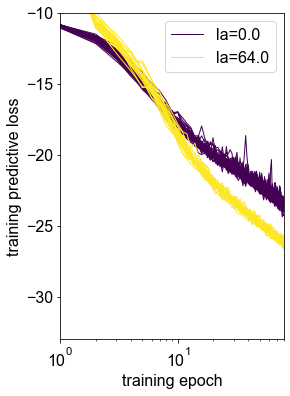

In [120]:
plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
plt.figure(figsize=(4, 6))  # Adjust the figure size as needed

lambda_svs = [0.0, 4.0, 8.0, 16.0, 32.0, 64.0]
lambda_svs = [0.0, 64.0]

for lambda_sv_i, lambda_sv in enumerate(lambda_svs):
    for state_vars_to_predict in [[9, 10, 11]]:
        for random_index in (range(20, 40) if lambda_sv_i > 0 else range(40)):
            color = plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(lambda_svs)))[lambda_sv_i]
            detach_gradients = False
            use_layernorm = False
            truncate_at_batch = 40
            n_hidden = 128
            train_epochs = 250
            save_every_epochs = 50
            max_gradient_norm = 100.0
            lr = 0.001
            random_index = random_index
            lambda_sv = lambda_sv
            dim_latent_z = 8
            #if lambda_sv == 0: state_vars_to_predict = []
            
            sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict)>0 else 'X'
            rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
                     f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"
    
            losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
            plt.plot(np.mean(losses_store, axis=1)[:, 0], linewidth=1, color=color, label=f"la={lambda_sv}" if random_index==20 else None)

plt.legend()
plt.ylim(-33, -22)
plt.xlim(0, 500)
plt.ylim(-33, -10)
plt.xlim(1, 80)
plt.xscale('log')
plt.xlabel("training epoch")
plt.ylabel("training predictive loss")
plt.show()

/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_56945/3394890457.py:26: RuntimeWarning: Mean of empty slice
  plt.plot(np.nanmean(losses_store, axis=1)[:, 0], linewidth=3, color=color, label=f"la={lambda_sv}" if random_index==10 else None)


FileNotFoundError: [Errno 2] No such file or directory: 'data/rnn_ln0_nh128_dlz8_mgn100.0_lr0.001_dg0_da40_sv9x10x11_lsv1_r10/rnn_losses.npz'

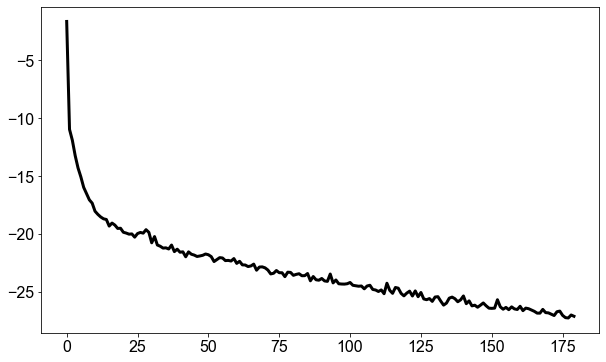

In [37]:
plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for random_index in range(10, 15):
    for lambda_sv_i, lambda_sv in enumerate([0.0, 1, 10]):
        color = ["black", "green", "blue", "orange", "red"][lambda_sv_i]
        state_vars_to_predict = [9, 10, 11]
        detach_gradients = False
        use_layernorm = False
        truncate_at_batch = 40
        n_hidden = 128
        train_epochs = 250
        save_every_epochs = 50
        max_gradient_norm = 100.0
        lr = 0.001
        random_index = random_index
        lambda_sv = lambda_sv
        dim_latent_z = 8
        #if lambda_sv == 0: state_vars_to_predict = []
        
        sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict)>0 else 'X'
        rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
                 f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"

        losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
        plt.plot(np.nanmean(losses_store, axis=1)[:, 0], linewidth=3, color=color, label=f"la={lambda_sv}" if random_index==10 else None)

plt.legend()
plt.ylim(-34, -22)
plt.xlim(0, 500)
plt.xlabel("training epoch")
plt.ylabel("predictive loss")
plt.show()

/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_56945/2503903801.py:37: RuntimeWarning: Mean of empty slice
  all_losses.append(np.nanmean(losses_store, axis=1)[:, 0])
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1741: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe', where=where)
/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_56945/2503903801.py:37: RuntimeWarning: Mean of empty slice
  all_losses.append(np.nanmean(losses_store, axis=1)[:, 0])


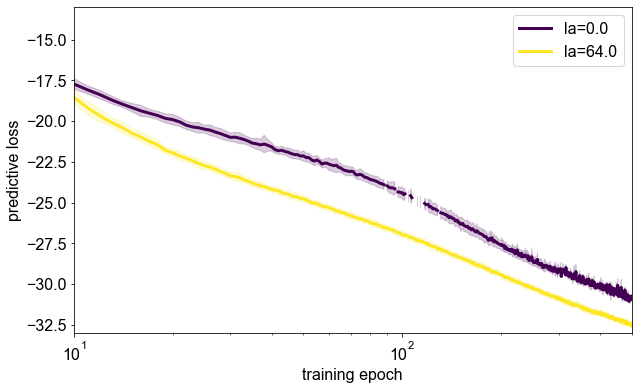

In [112]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

lambda_svs = [0.0, 4.0, 8.0, 16.0, 32.0, 64.0]
lambda_svs = [0.0, 64.0]


for lambda_sv_i, lambda_sv in enumerate(lambda_svs):
    color = plt.cm.get_cmap('viridis')(np.linspace(0, 1, len(lambda_svs)))[lambda_sv_i]

    random_indices = range(20, 40) if lambda_sv_i>0 else range(0, 40)
    all_losses = []
    for random_index in random_indices:
        state_vars_to_predict = [9, 10, 11]
        detach_gradients = False
        use_layernorm = False
        truncate_at_batch = 40
        n_hidden = 128
        train_epochs = 250
        save_every_epochs = 50
        max_gradient_norm = 100.0
        lr = 0.001
        dim_latent_z = 8
        
        # if lambda_sv == 0:
        #     state_vars_to_predict = []
        
        sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict) > 0 else 'X'
        rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
                 f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"

        try:
            losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
            all_losses.append(np.nanmean(losses_store, axis=1)[:, 0])
        except:
            pass
    
    all_losses = np.array(all_losses)
    mean_losses = np.nanmean(all_losses, axis=0)
    std_losses = np.nanstd(all_losses, axis=0)
    
    plt.plot(mean_losses, linewidth=3, color=color, label=f"la={lambda_sv}")
    plt.fill_between(range(len(mean_losses)), mean_losses - std_losses, mean_losses + std_losses, color=color, alpha=0.2)

plt.legend()
plt.ylim(-33, -26)
plt.xlim(100, 500)
plt.ylim(-33, -13)
plt.xlim(10, 500)
plt.xscale('log')
plt.xlabel("training epoch")
plt.ylabel("predictive loss")
plt.show()

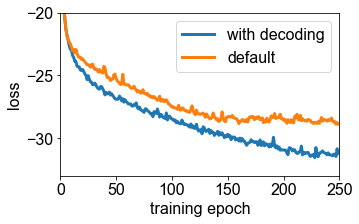

In [13]:
plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed

state_vars_to_predict=[9, 10, 11]
detach_gradients = True
truncate_at_batch = 40
use_layernorm = True
random_index = 1
rnn_id = f"dg{1 if detach_gradients else 0}_ln{1 if use_layernorm else 0}_da{truncate_at_batch}_dv{len(state_vars_to_predict)}_r{random_index}"
dim_latent_z = 8
with open(f'data/rnn{rnn_id}/rnn_meta.json', "r") as in_file:
    rnn_meta = json.loads(in_file.read())
losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
plt.plot(np.mean(losses_store, axis=1)[:, 0], linewidth=3, label="with decoding")

state_vars_to_predict=[]
rnn_id = f"dg{1 if detach_gradients else 0}_ln{1 if use_layernorm else 0}_da{truncate_at_batch}_dv{len(state_vars_to_predict)}_r{random_index}"
with open(f'data/rnn{rnn_id}/rnn_meta.json', "r") as in_file:
    rnn_meta = json.loads(in_file.read())
losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
plt.plot(np.mean(losses_store, axis=1)[:, 0], linewidth=3, label="default")

plt.legend()
plt.ylim(-33, -20)
plt.xlim(0, 250)
plt.xlabel("training epoch")
plt.ylabel("loss")
plt.show()